In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
dataTrain = pd.read_csv("train.csv")
dataTest = pd.read_csv('test.csv')

Text(0.5, 1.0, 'Lables with correlation coefficient > Threshold (0.5)')

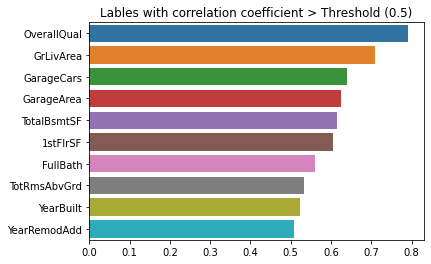

In [23]:
THRESHOLD = 0.5

data = dataTrain.corr()["SalePrice"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>THRESHOLD:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Lables with correlation coefficient > Threshold (0.5)')

In [24]:
unnecessary = []
lab = dataTrain.SalePrice
idCol = dataTest.Id
dataTrain = dataTrain.drop(columns=[str(item) for item in dataTrain.columns[1:] if str(item) not in labels])
dataTest = dataTest.drop(columns=[str(item) for item in dataTest.columns[1:] if str(item) not in labels])
dataTrain = dataTrain.drop(columns=['Id'])
dataTest = dataTest.drop(columns=['Id'])

In [25]:
dataTrain = dataTrain.fillna(method='bfill')
dataTest = dataTest.fillna(method='bfill')

In [28]:
#checking if futher NaN values persist
sum(dataTrain.isnull().sum()), sum(dataTest.isnull().sum())

(0, 0)

In [27]:
#split data
yTrain = lab
xTest = dataTest.to_numpy()
xTrain = dataTrain.to_numpy()

xTrain.shape, yTrain.shape, xTest.shape

((1460, 10), (1460,), (1459, 10))

In [29]:
#Create model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
reg = GradientBoostingRegressor(random_state=42, loss='ls', learning_rate=0.1)
reg.fit(xTrain, yTrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [31]:
y_pred = reg.predict(xTest)

In [32]:
f = reg.score(xTrain, yTrain)
f

0.9322603878292162

In [5]:
#Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=15)
model.fit(xTrain, yTrain)
pred = model.predict(xTrain)
print('R2 Score: ', sklearn.metrics.r2_score(yTrain, pred))

R2 Score:  0.9997637552601291


In [38]:
#Submission
submission_file = pd.DataFrame(columns=['Id', 'SalePrice'])
submission_file['Id'] = idCol
submission_file['SalePrice'] = model.precdit(xTest)
submission_file['Id'] = submission_file['Id'].astype(int)

#Saving
submission.to_csv('submission.csv', index=False)

AttributeError: 'RandomForestClassifier' object has no attribute 'precdit'